# Transactions EDA – Univariate & Multivariate
Goal: Explore df, fix types, handle missing values, and prepare for feature engineering and feature selection

In [30]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mastercard_challenge.visualization.visualize import dist_visualisation

2025-05-16 17:19:55.916 | INFO     | mastercard_challenge.config:<module>:11 - PROJ_ROOT path is: /Users/pawel/projects/mastercard/mastercard_challenge


In [2]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

DATA_PROCESSED_DIR = Path("../data/processed")

In [3]:
df = pd.read_parquet(DATA_PROCESSED_DIR / "transactions.parquet")

In [4]:
print("Initial shape:", df.shape)

Initial shape: (500000, 14)


## Descriptive statistics

In [5]:
df.head()

,transaction_id,timestamp,user_id,merchant_id,amount,channel,currency,device,location,payment_method,is_international,session_length_seconds,is_first_time_merchant,is_fraud
0,TX000000,2022-06-17 23:28:00,U14804,M0314,130.03,in-store,EUR,Android,"{'lat': 40.057938, 'long': 14.959737}",debit_card,1,145,0,0
1,TX000001,2022-01-04 15:39:00,U16634,M0675,132.00,online,EUR,Android,"{'lat': 42.05935, 'long': 1.596625}",debit_card,1,32,1,0
2,TX000002,2022-09-09 21:58:00,U18005,M0479,8.65,online,EUR,Android,"{'lat': 50.923432, 'long': 21.795262}",credit_card,1,604,1,0
3,TX000003,2023-11-20 06:40:00,U13690,M0538,19.82,mobile,EUR,iOS,"{'lat': 56.833396, 'long': -9.881566}",credit_card,0,1031,1,0
4,TX000004,2022-04-28 08:08:00,U04642,M0128,101.92,in-store,EUR,Android,"{'lat': 54.042996, 'long': 2.168516}",credit_card,1,330,0,0


In [6]:
df.dtypes

transaction_id                    object
timestamp                 datetime64[ns]
user_id                           object
merchant_id                       object
amount                           float64
channel                           object
currency                          object
device                            object
location                          object
payment_method                    object
is_international                   int64
session_length_seconds             int64
is_first_time_merchant             int64
is_fraud                           int64
dtype: object

In [7]:
# --- 1. Data type corrections ---
df["is_international"] = df["is_international"].astype(bool)
df["is_first_time_merchant"] = df["is_first_time_merchant"].astype(bool)
df["is_fraud"] = df["is_fraud"].astype(bool)

In [8]:
df.dtypes

transaction_id                    object
timestamp                 datetime64[ns]
user_id                           object
merchant_id                       object
amount                           float64
channel                           object
currency                          object
device                            object
location                          object
payment_method                    object
is_international                    bool
session_length_seconds             int64
is_first_time_merchant              bool
is_fraud                            bool
dtype: object

In [9]:
# --- 2. Handle explicit missing values ---
missing = df.isna().sum()
print("Explicit Missing values:\n", missing[missing > 0])

Explicit Missing values:
 Series([], dtype: int64)


In [10]:
df.describe()

,timestamp,amount,session_length_seconds
count,500000,500000.000000,500000.000000
mean,2022-12-31 16:45:04.497720576,49.915662,614.987182
min,2022-01-01 00:06:00,0.000000,30.000000
25%,2022-07-01 11:03:45,14.370000,323.000000
50%,2022-12-31 20:08:30,34.560000,614.000000
75%,2023-07-02 08:45:15,69.172500,907.000000
max,2023-12-31 23:57:00,714.860000,1200.000000
std,NaN,49.990657,338.091496


In [19]:
df[df["amount"] == 0]

,transaction_id,timestamp,user_id,merchant_id,amount,channel,device,location,payment_method,is_international,session_length_seconds,is_first_time_merchant,is_fraud
5809,TX005809,2022-01-10 02:53:00,U10337,M0163,0.0,in-store,iOS,"{'lat': 45.635827, 'long': 39.805157}",mobile_payment,True,894,True,False
10650,TX010650,2022-05-24 18:32:00,U01404,M0652,0.0,in-store,Web,"{'lat': 40.163625, 'long': 34.021887}",bank_transfer,True,562,False,True
14120,TX014120,2022-03-03 18:28:00,U13813,M0451,0.0,in-store,Web,"{'lat': 54.946552, 'long': 39.822962}",bank_transfer,False,809,True,False
22827,TX022827,2023-11-09 04:36:00,U15743,M0590,0.0,online,iOS,"{'lat': 40.117787, 'long': -3.656752}",bank_transfer,True,100,False,False
52258,TX052258,2023-06-06 04:05:00,U14264,M0393,0.0,in-store,Android,"{'lat': 61.207066, 'long': -6.435031}",bank_transfer,True,1124,False,False
53734,TX053734,2023-10-06 14:38:00,U06988,M0627,0.0,mobile,Android,"{'lat': 49.880624, 'long': 12.264652}",credit_card,True,308,False,True
76457,TX076457,2023-02-06 09:04:00,U17102,M0454,0.0,mobile,Web,"{'lat': 57.649976, 'long': 31.984215}",debit_card,True,669,True,False
84012,TX084012,2022-06-03 06:48:00,U07246,M0634,0.0,mobile,Android,"{'lat': 47.920362, 'long': 16.463018}",credit_card,False,221,False,False
129292,TX129292,2022-06-29 20:01:00,U05293,M0504,0.0,online,Web,"{'lat': 63.014322, 'long': 25.458709}",bank_transfer,False,1105,True,False
156029,TX156029,2023-10-30 18:58:00,U03316,M0966,0.0,online,Web,"{'lat': 38.64678, 'long': 31.557532}",credit_card,True,334,True,False


In [11]:
# --- 3. Univariate analysis ---

### Target variable

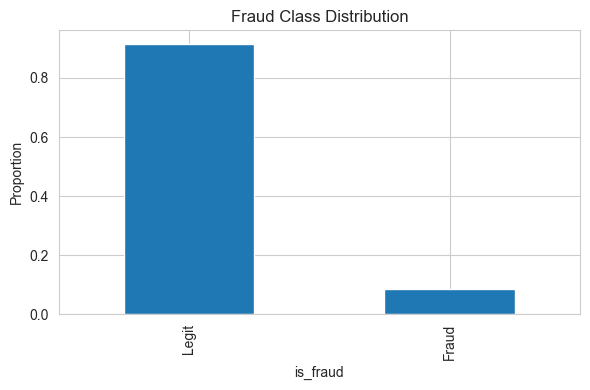

In [12]:
import matplotlib.pyplot as plt


fraud_counts = df["is_fraud"].value_counts(normalize=True)


fig, ax = plt.subplots(figsize=(6, 4))

fraud_counts.plot(kind="bar", ax=ax)

ax.set_title("Fraud Class Distribution")
ax.set_xticks([0, 1])
ax.set_xticklabels(["Legit", "Fraud"])
ax.set_ylabel("Proportion")

plt.tight_layout()
plt.show()

#### Class imbalance summary

In [13]:
class_dist = df["is_fraud"].value_counts(normalize=True).rename_axis("Class").reset_index(name="Proportion")
print("Class Imbalance Summary:\n")
print(class_dist.to_markdown(index=False))

Class Imbalance Summary:

| Class   |   Proportion |
|:--------|-------------:|
| False   |     0.915178 |
| True    |     0.084822 |


#### Class distribution is highly imbalanced.

| Class | Approximate Share |
|--------|-------------------|
| Legit  | ~90%+             |
| Fraud  | ~10% or less      |

This has major implications for modeling:
- Accuracy will be misleading
- Use metrics like F1, Recall, ROC AUC
- Consider resampling (undersample majority or oversample minority)
- Use algorithms with built-in support for imbalanced data (e.g., XGBoost, class_weight=balanced)

### Numerical features

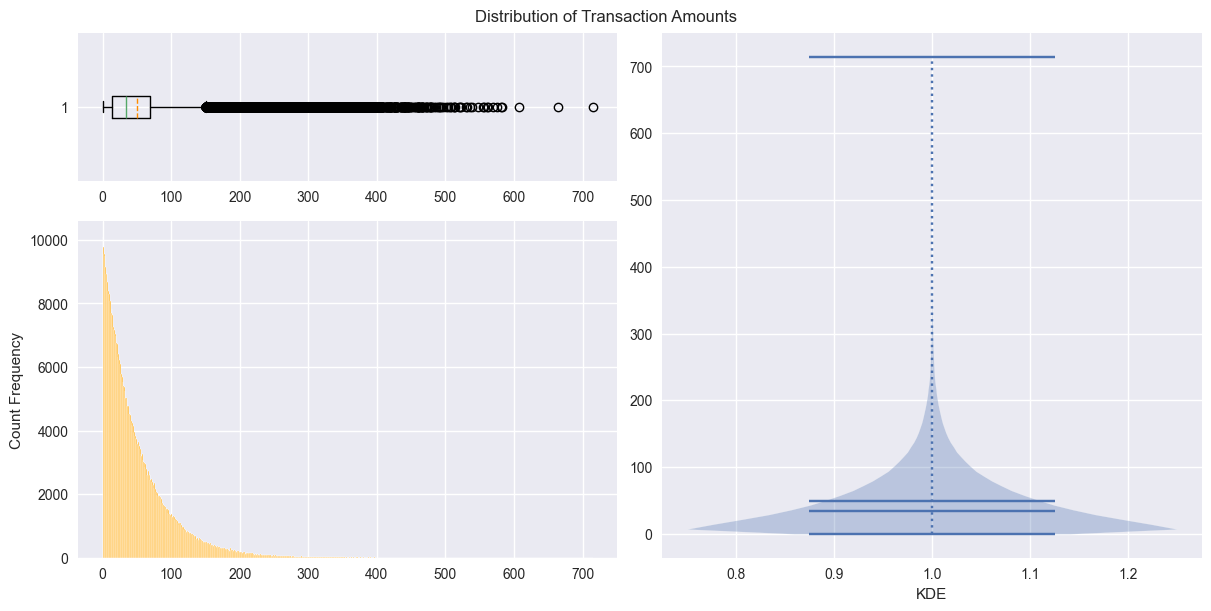

In [31]:
dist_visualisation(df["amount"], title="Distribution of Transaction Amounts")

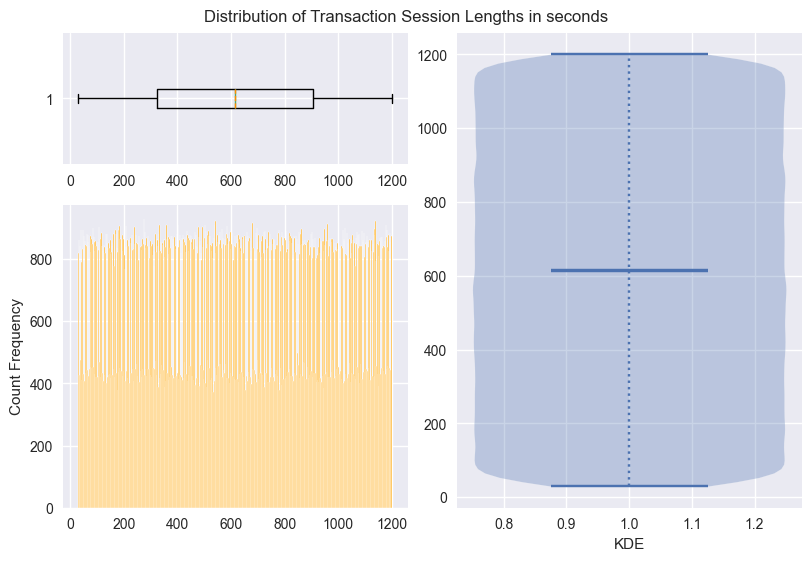

In [32]:
dist_visualisation(df["session_length_seconds"], title="Distribution of Transaction Session Lengths in seconds")

#### Observations on numerical distributions:

- **amount** is strongly right-skewed with a long tail. This suggests the presence of extreme high values.
  - Recommendation: Apply log transformation (e.g., `log1p`) for algorithms sensitive to distribution shape.

- **session_length_seconds** appears uniformly distributed, which is unusual in real behavioral data.
  - Likely indicates synthetic generation or flattening.
  - Might carry low predictive power unless frauds are concentrated in specific ranges (to be checked later).


### Categorical features

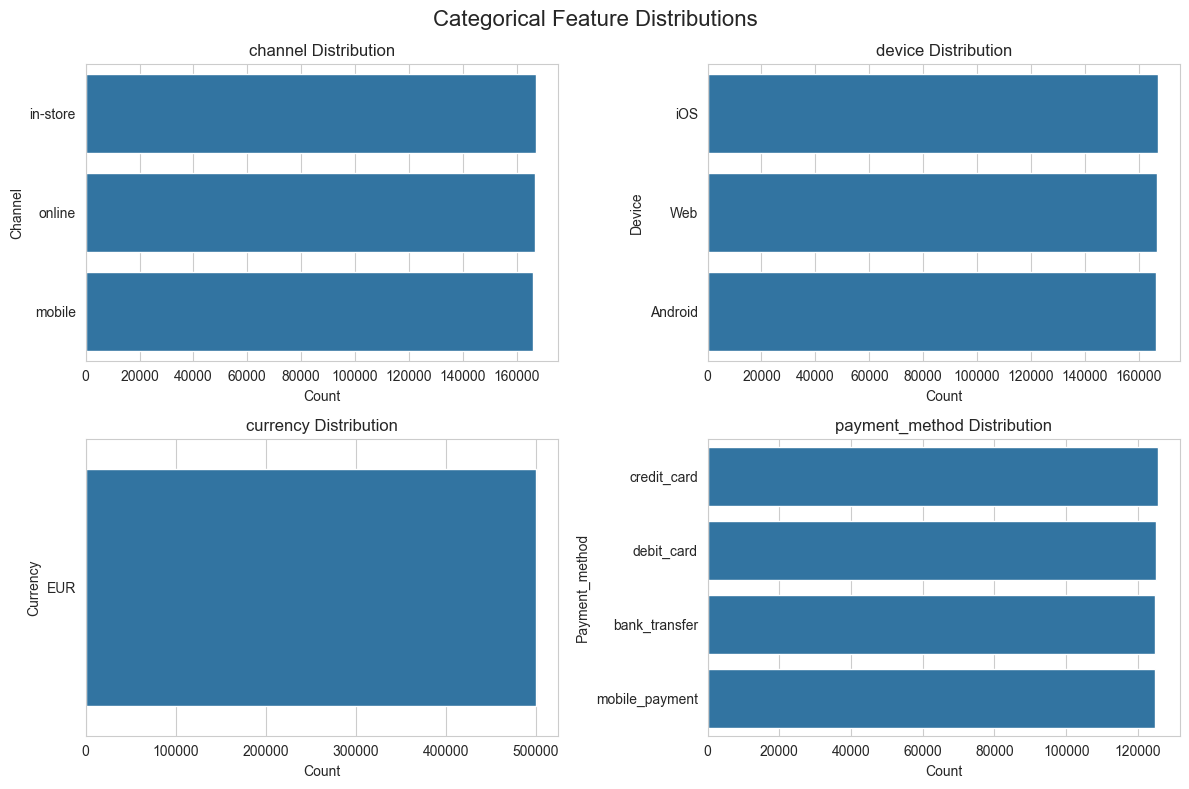

In [15]:
categorical_cols = ["channel", "device", "currency", "payment_method"]
n_cols = 2
n_rows = (len(categorical_cols) + 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 8))

for ax, col in zip(axes.flat, categorical_cols):
    sns.countplot(y=col, data=df, ax=ax, order=df[col].value_counts().index)
    ax.set_title(f"{col} Distribution")
    ax.set_xlabel("Count")
    ax.set_ylabel(col.capitalize())

for ax in axes.flat[len(categorical_cols):]:
    ax.set_visible(False)

fig.suptitle("Categorical Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

### Observations on categorical distributions:

- **channel**, **device**, and **payment_method** show almost perfectly balanced category distributions.
  - This is highly unusual in real-world data and indicates synthetic balancing or controlled generation.
  - Real distributions would likely be skewed due to platform/user/device preferences.

- **currency** has only one value (EUR), making it non-informative.
  - Recommendation: Drop this feature from modeling unless other currencies are added.

These patterns confirm the synthetic nature of the dataset and imply that model generalization should be interpreted with caution.


In [16]:
df.drop(columns=["currency"], inplace=True)

## Multivariate analysis

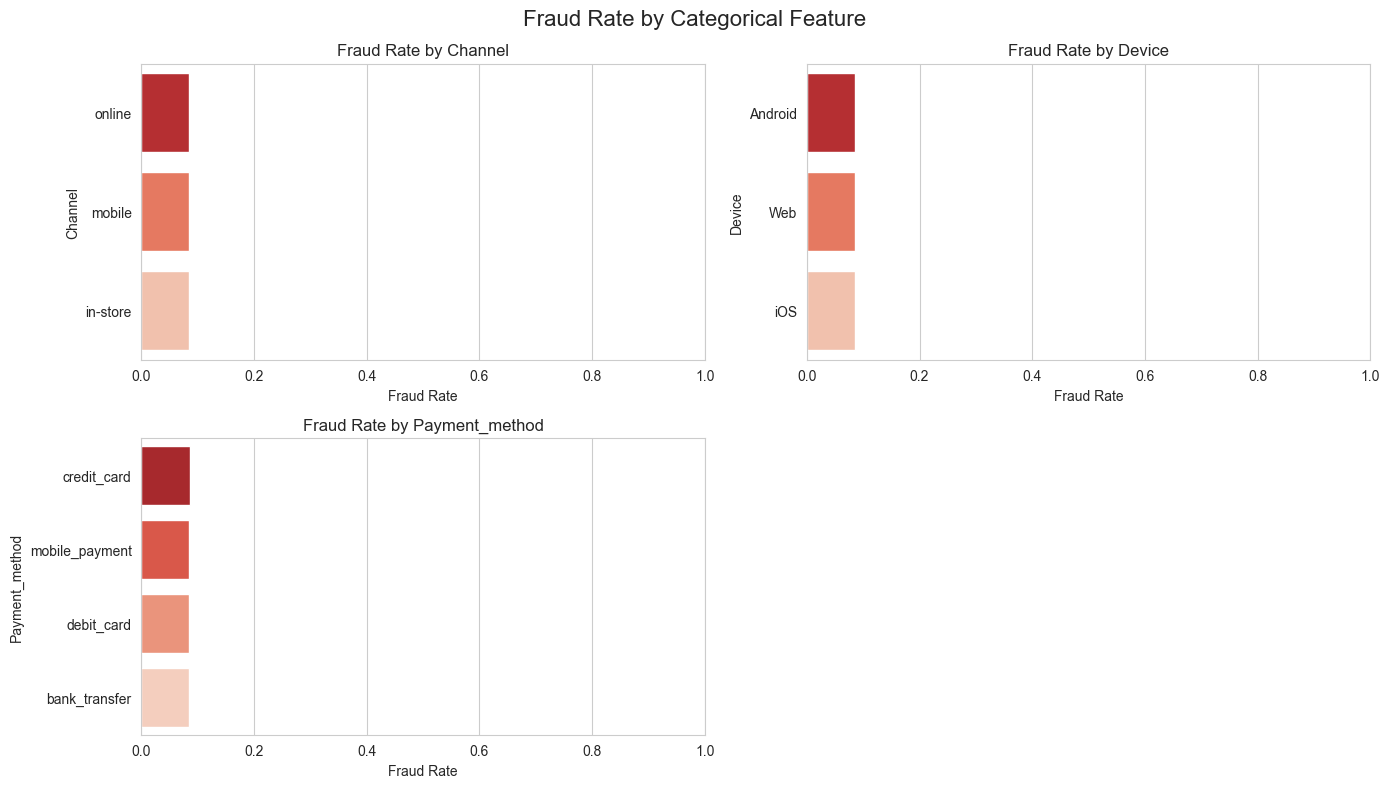

In [17]:
categorical_cols = ["channel", "device", "payment_method"]
n_cols = 2
n_rows = (len(categorical_cols) + 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 8))

for ax, col in zip(axes.flat, categorical_cols):
    fraud_rate = df.groupby(col)["is_fraud"].mean().sort_values(ascending=False)

    sns.barplot(
        x=fraud_rate.values,
        y=fraud_rate.index,
        hue=fraud_rate.index,
        palette="Reds_r",
        ax=ax,
        legend=False
    )

    ax.set_title(f"Fraud Rate by {col.capitalize()}")
    ax.set_xlabel("Fraud Rate")
    ax.set_ylabel(col.capitalize())
    ax.set_xlim(0, 1)

for ax in axes.flat[len(categorical_cols):]:
    ax.set_visible(False)

fig.suptitle("Fraud Rate by Categorical Feature", fontsize=16)
plt.tight_layout()
plt.show()

#### Observations on fraud rates by category:

- Fraud rates are low across all categorical features, ranging approximately from 5% to 10%.
- Differences between categories are small and likely not statistically significant.
- None of the categorical features on their own show strong predictive signal for fraud.

These results suggest that categorical variables may only be useful in interaction with other features or in tree-based models that handle weak signals collectively.


### Correlation matrix

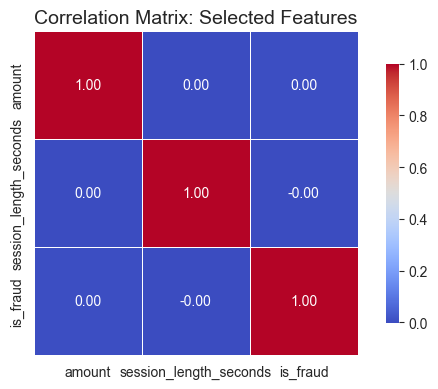

In [18]:
selected = ["amount", "session_length_seconds", "is_fraud"]
corr = df[selected].corr()


fig, ax = plt.subplots(figsize=(6, 4))


sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    ax=ax
)

ax.set_title("Correlation Matrix: Selected Features", fontsize=14)
plt.tight_layout()
plt.show()

#### Correlation Matrix – Observations

- There is **no linear correlation** between `is_fraud` and either of the numerical features:
  - `amount` ↔ `is_fraud`: ~0.00
  - `session_length_seconds` ↔ `is_fraud`: ~0.00

- This confirms that **individual numeric features do not linearly explain fraud**.
  - Any potential predictive power may emerge from **non-linear interactions**, **feature engineering**, or **model ensembles**.

- The complete lack of signal strengthens the hypothesis that the dataset is **synthetic** or **deliberately decorrelated**.

Implication:
- Simple linear models (like Logistic Regression) on raw features will perform poorly.
- More advanced models (e.g., decision trees, boosting, neural nets) will be required.

### 5. Time-based analysis

In [24]:
# Hour and weekday features
df["hour"] = df["timestamp"].dt.hour
df["dayofweek"] = df["timestamp"].dt.dayofweek

In [25]:
# Weekly fraud rate with rolling average
df_ts = df.set_index("timestamp").sort_index()
fraud_counts = df_ts.resample("W")["is_fraud"].sum()
total_counts = df_ts.resample("W")["is_fraud"].count()
fraud_rate = (fraud_counts / total_counts).fillna(0)

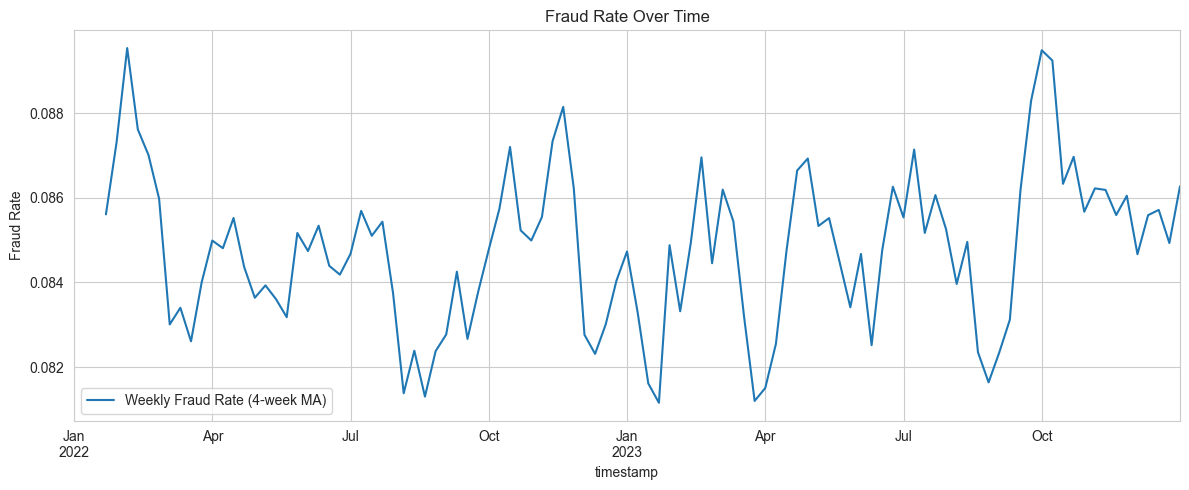

In [27]:
fig, ax = plt.subplots(figsize=(12, 5))

fraud_rate.rolling(4).mean().plot(ax=ax, label="Weekly Fraud Rate (4-week MA)")

ax.set_ylabel("Fraud Rate")
ax.set_title("Fraud Rate Over Time")
ax.legend()

fig.tight_layout()
plt.show()

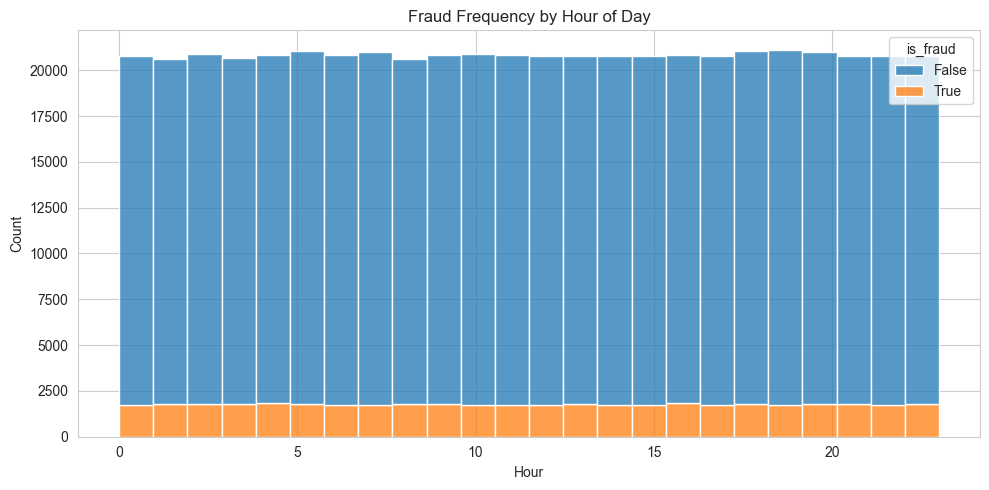

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(data=df, x="hour", hue="is_fraud", bins=24, multiple="stack", ax=ax)

ax.set_title("Fraud Frequency by Hour of Day")
ax.set_xlabel("Hour")
ax.set_ylabel("Count")

fig.tight_layout()
plt.show()

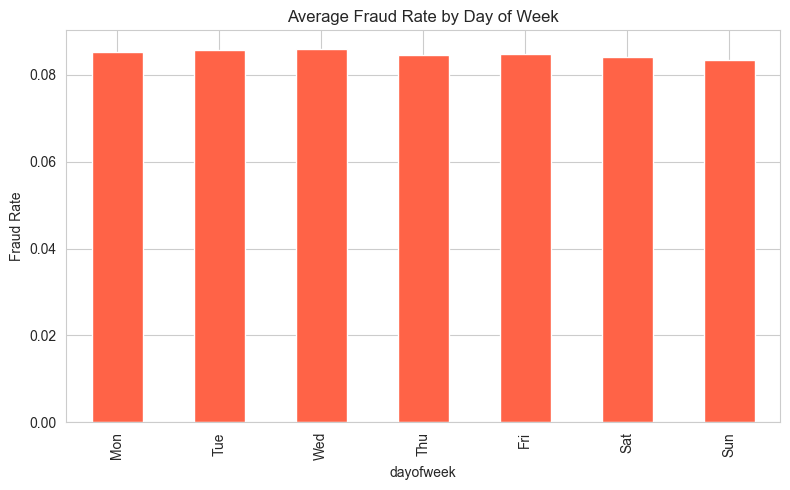

In [29]:

fraud_by_day = df.groupby("dayofweek")["is_fraud"].mean()

fig, ax = plt.subplots(figsize=(8, 5))

fraud_by_day.plot(kind="bar", color="tomato", ax=ax)

ax.set_xticks(range(7))
ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
ax.set_title("Average Fraud Rate by Day of Week")
ax.set_ylabel("Fraud Rate")

fig.tight_layout()
plt.show()


fraud_by_day = df.groupby("dayofweek")["is_fraud"].mean()

fig, ax = plt.subplots(figsize=(8, 5))

fraud_by_day.plot(kind="bar", color="tomato", ax=ax)

ax.set_xticks(range(7))
ax.set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
ax.set_title("Average Fraud Rate by Day of Week")
ax.set_ylabel("Fraud Rate")

fig.tight_layout()
plt.show()### Temporal Fraud Analysis – Observations

#### 1. Fraud Rate Over Time (weekly trend)
- The fraud rate fluctuates mildly between ~8.1% and 8.9% over the two-year span.
- No clear upward or downward trend, but some short-term volatility is present.
- Suggests that fraud behavior is stationary over time (non-seasonal).

#### 2. Fraud Frequency by Hour of Day
- Fraud and legit transactions are evenly distributed across all hours.
- No visible peak during night or business hours.
- Indicates time of day likely has no predictive signal.

#### 3. Average Fraud Rate by Day of Week
- All days show nearly equal fraud rates (~8.5%).
- No significant weekday vs. weekend pattern.

### Summary
- Time-based features appear non-informative in isolation.
- Their value may emerge only through interactions or in tree-based models.
- Results align with the synthetic structure of the dataset.
